C:\Users\MiguelVidela\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\MiguelVidela\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Dataset from Relu6 Accuracy: 53.33%
Dataset from Relu7 Accuracy: 47.67%


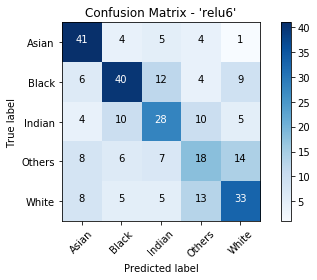

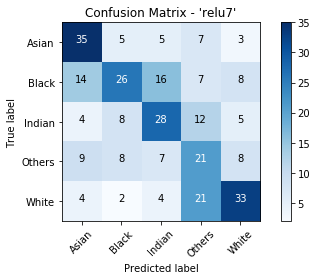

In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Dataset Load
dataset_1 = np.load('./relu6.npy')
dataset_2 = np.load('./relu7.npy')

# Labels Generation
labels = np.array([])
for i in range(dataset_1.shape[0]):
    l = np.full(dataset_1.shape[1], i)
    labels = np.vstack([labels, l]) if labels.size else l
labels_rs = labels.reshape(dataset_1.shape[0] * dataset_1.shape[1])
dataset_1_rs = dataset_1.reshape(dataset_1.shape[0] * dataset_1.shape[1], dataset_1.shape[2])
dataset_2_rs = dataset_2.reshape(dataset_2.shape[0] * dataset_2.shape[1], dataset_2.shape[2])

# Train-Test Split
train_data_1, test_data_1, train_labels_1, test_labels_1 = train_test_split(dataset_1_rs, labels_rs, test_size=0.3, random_state=42)
train_data_2, test_data_2, train_labels_2, test_labels_2 = train_test_split(dataset_2_rs, labels_rs, test_size=0.3, random_state=42)

# Standard Scaling
scaler = StandardScaler()
train_data_1_sc = scaler.fit_transform(train_data_1)
scaler = StandardScaler()
test_data_1_sc = scaler.fit_transform(test_data_1)
scaler = StandardScaler()
train_data_2_sc = scaler.fit_transform(train_data_2)
scaler = StandardScaler()
test_data_2_sc = scaler.fit_transform(test_data_2)

# Classification
clf_1 = LinearSVC()
clf_2 = LinearSVC()
clf_1.fit(train_data_1_sc, np.squeeze(train_labels_1))
clf_2.fit(train_data_2_sc, np.squeeze(train_labels_2))
acc_1 = clf_1.score(test_data_1_sc, np.squeeze(test_labels_1))
acc_2 = clf_2.score(test_data_2_sc, np.squeeze(test_labels_2))
print('Dataset from Relu6 Accuracy: {0:.2f}%'.format(100 * acc_1))
print('Dataset from Relu7 Accuracy: {0:.2f}%'.format(100 * acc_2))

# Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

pred_1 = clf_1.predict(test_data_1_sc)
pred_2 = clf_2.predict(test_data_2_sc)
cm_1 = confusion_matrix(test_labels_1, pred_1)
cm_2 = confusion_matrix(test_labels_2, pred_2)
plot_confusion_matrix(cm_1, classes=['Asian', 'Black', 'Indian', 'Others', 'White'],
                      title="Confusion Matrix - 'relu6'")
plot_confusion_matrix(cm_2, classes=['Asian', 'Black', 'Indian', 'Others', 'White'],
                      title="Confusion Matrix - 'relu7'")